<a href="https://colab.research.google.com/github/Rohawaseem/Task-2/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("twitter data.csv")

Saving twitter data.csv to twitter data (1).csv


In [6]:
print("Columns:", df.columns)
print("Unique labels:", df['label'].unique())

Columns: Index(['id', 'label', 'tweet'], dtype='object')
Unique labels: [ 0.  1. nan]


In [7]:
TEXT_COL = 'tweet'
LABEL_COL = 'label'

# Drop rows with missing tweets
df = df.dropna(subset=[TEXT_COL]).reset_index(drop=True)

df.head()


,id,label,tweet
0,1.0,0.0,@user when a father is dysfunctional and is s...
1,2.0,0.0,@user @user thanks for #lyft credit i can't us...
2,3.0,0.0,bihday your majesty
3,4.0,0.0,#model i love u take with u all the time in ...
4,5.0,0.0,factsguide: society now #motivation


In [8]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)           # remove URLs
    text = re.sub(r'@\w+', '', text)              # remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)   # remove hashtags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)   # remove punctuation
    text = text.lower().strip()                   # lowercase & strip spaces
    return text

# Apply cleaning
df['cleaned'] = df[TEXT_COL].apply(clean_text)

df.head()


,id,label,tweet,cleaned
0,1.0,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2.0,0.0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont ...
2,3.0,0.0,bihday your majesty,bihday your majesty
3,4.0,0.0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5.0,0.0,factsguide: society now #motivation,factsguide society now


In [9]:
# Map sentiment labels to numbers
label_map = {'Negative':0, 'Neutral':1, 'Positive':2}
df['label_code'] = df[LABEL_COL].map(label_map)

# Drop any rows that couldn't be mapped
df = df.dropna(subset=['label_code']).reset_index(drop=True)
df['label_code'] = df['label_code'].astype(int)

print("Rows after cleaning:", len(df))
print("Label distribution:\n", df['label_code'].value_counts())


Rows after cleaning: 0
Label distribution:
 Series([], Name: count, dtype: int64)


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000
MAX_LEN = 50

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned'])

X_seq = tokenizer.texts_to_sequences(df['cleaned'])
X = pad_sequences(X_seq, maxlen=MAX_LEN, padding='post', truncating='post')

y = df['label_code'].values

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (0, 50)
Shape y: (0,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=64),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(len(df['label_code'].unique()), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
import pandas as pd
from google.colab import files

uploaded = files.upload()  # Upload "twitter data.csv"
df = pd.read_csv("twitter data.csv")

# Check first 5 rows
print(df.head())

# Check column types
print(df.info())


Saving twitter data.csv to twitter data (2).csv
    id  label                                              tweet
0  1.0    0.0   @user when a father is dysfunctional and is s...
1  2.0    0.0  @user @user thanks for #lyft credit i can't us...
2  3.0    0.0                                bihday your majesty
3  4.0    0.0  #model   i love u take with u all the time in ...
4  5.0    0.0             factsguide: society now    #motivation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      31378 non-null  float64
 1   label   31378 non-null  float64
 2   tweet   31378 non-null  object 
dtypes: float64(2), object(1)
memory usage: 749.2+ KB
None


In [17]:
# Check if labels are strings or numeric
if df[LABEL_COL].dtype == object:
    # Convert to lowercase & map
    label_map = {'negative':0, 'neutral':1, 'positive':2}
    df['label_code'] = df[LABEL_COL].str.lower().map(label_map)
else:
    # Numeric labels already
    df['label_code'] = df[LABEL_COL]

# Drop rows where mapping failed
df = df.dropna(subset=['label_code']).reset_index(drop=True)
df['label_code'] = df['label_code'].astype(int)

print("Rows after label processing:", len(df))
print("Label distribution:\n", df['label_code'].value_counts())


Rows after label processing: 31378
Label distribution:
 label_code
0    29174
1     2204
Name: count, dtype: int64


In [18]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)            # remove urls
    text = re.sub(r'@\w+', '', text)               # remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)     # remove hashtags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)     # remove punctuation
    text = text.lower().strip()
    return text

df['cleaned'] = df[TEXT_COL].apply(clean_text)


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000
MAX_LEN = 50

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned'])

X_seq = tokenizer.texts_to_sequences(df['cleaned'])
X = pad_sequences(X_seq, maxlen=MAX_LEN, padding='post', truncating='post')
y = df['label_code'].values

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (31378, 50)
Shape y: (31378,)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=64),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(len(df['label_code'].unique()), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X, y,
    epochs=10,
    batch_size=16,          # safe small batch
    validation_split=0.2,
    callbacks=[es]
)


Epoch 1/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 58s 35ms/step - accuracy: 0.9303 - loss: 0.2843 - val_accuracy: 0.9316 - val_loss: 0.2494
Epoch 2/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.9302 - loss: 0.2629 - val_accuracy: 0.9316 - val_loss: 0.2424
Epoch 3/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9277 - loss: 0.2587 - val_accuracy: 0.9316 - val_loss: 0.2329
Epoch 4/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.9326 - loss: 0.2357 - val_accuracy: 0.9316 - val_loss: 0.2320
Epoch 5/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.9306 - loss: 0.2331 - val_accuracy: 0.9316 - val_loss: 0.2304
Epoch 6/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.9280 - loss: 0.2389 - val_accuracy: 0.9316 - val_loss: 0.2276
Epoch 7/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9300 - loss: 0.2306 - val_accuracy: 0.9316 - val_loss: 0.2218
Epoch 8/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9303 -

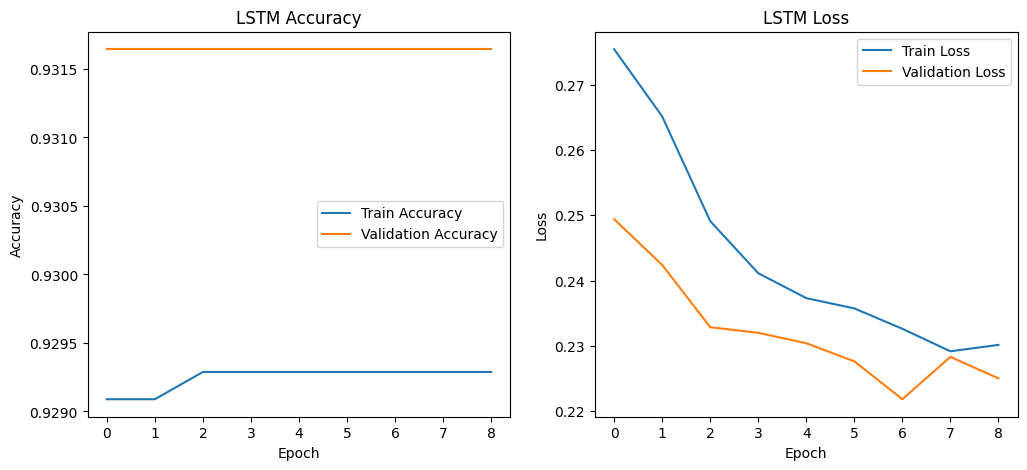

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
